In [69]:
#importing all necesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#reading dataset
df=pd.read_csv(r"C:\Users\USER\Desktop\Analytics with Excel\Case Study - EDA - Sem 1\application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#shape of the data set
df.shape

(307511, 122)

In [72]:
#checking null value columns having null values more than 50%
emptycolu=df.isnull().sum()
emptycolu=emptycolu[emptycolu.values>(0.5*len(emptycolu))]
len(emptycolu)


64

In [73]:
#removing those 64 columns
emptycolu = list(emptycolu[emptycolu.values>=0.5].index)
df.drop(labels=emptycolu,axis=1,inplace=True)
print(len(emptycolu))

64


In [7]:
#checking for columns if they have less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


there are few columns having null values, it can be seen that AMT_ANNUITY column has less percentage of null values and is a necessary column
whereas other columns having null values are unwanted columns which can be dropped.


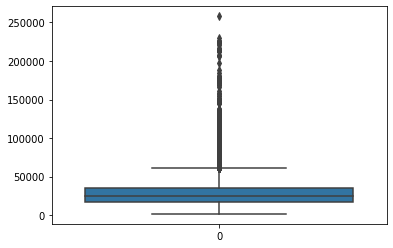

In [8]:
sns.boxplot(data=df['AMT_ANNUITY'])
plt.show()

Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean,
Hence we will fill those missing banks with median value

In [9]:
# Filling missing values with median
values=df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [10]:
# Searching for the column for null values
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [11]:
#Checking for rows having null values more than or equal to 30%
emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
len(emptyrow)

0

In [12]:
#remove the unwanted columns
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [13]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'.
So we have to find the number of rows and columns 
and implement suitable techniques on them to fill those missing values or to delete them.

In [14]:
# let's find these categorical columns having these 'XNA' values
print(df[df['CODE_GENDER']=='XNA'].shape)
print(df[df['ORGANIZATION_TYPE']=='XNA'].shape)

(4, 28)
(55374, 28)


In [15]:
#describing Gender column
# Describing the Gender column to check the number of females and males
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, 
we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [16]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [17]:
# Describing the organization type column
df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. 
Which means 18% of the column is having this values.
Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [18]:
# Hence, dropping the rows of total 55374 having 'XNA' values in the organization type column
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [19]:
#casting all variables into numeric in the dataset
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


The continuous  variable categories column are 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' 
so, we will be creating bins for these variables.

In [20]:
#creating bins for amount income total
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots=['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
df['AMT_INCOME_TOT_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins=bins,labels=slots)

In [21]:
#creating bins for credit amount
bins=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slot=['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
df['CREDIT_AMT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slot)

In [22]:
#diving the dataset into two different dataset i.e TARGET1-client with payment difficulties,and TARGET0-all other
df_target0=df.loc[df["TARGET"]==0]
df_target1=df.loc[df["TARGET"]==1]

In [23]:
#CALCULATING THE RATIO OF IMBALANCE OR IMBALANCE PERCENTAGE
#majority is target0 and minority is target1
round(len(df_target0)/len(df_target1),2)

10.55

so the imbalance ratio is 10.55

UNIVARIATE ANALYSIS FOR CATEGORIES
NOW DOING CATEGORICAL UNIVARIATE ANALYSIS IN LOGARITHMIC SCALE FOR TARGET0=CLIENT WITH NO PAYMENT DIFFICULTIES

In [24]:
#Count plotting in logarithmic scale
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

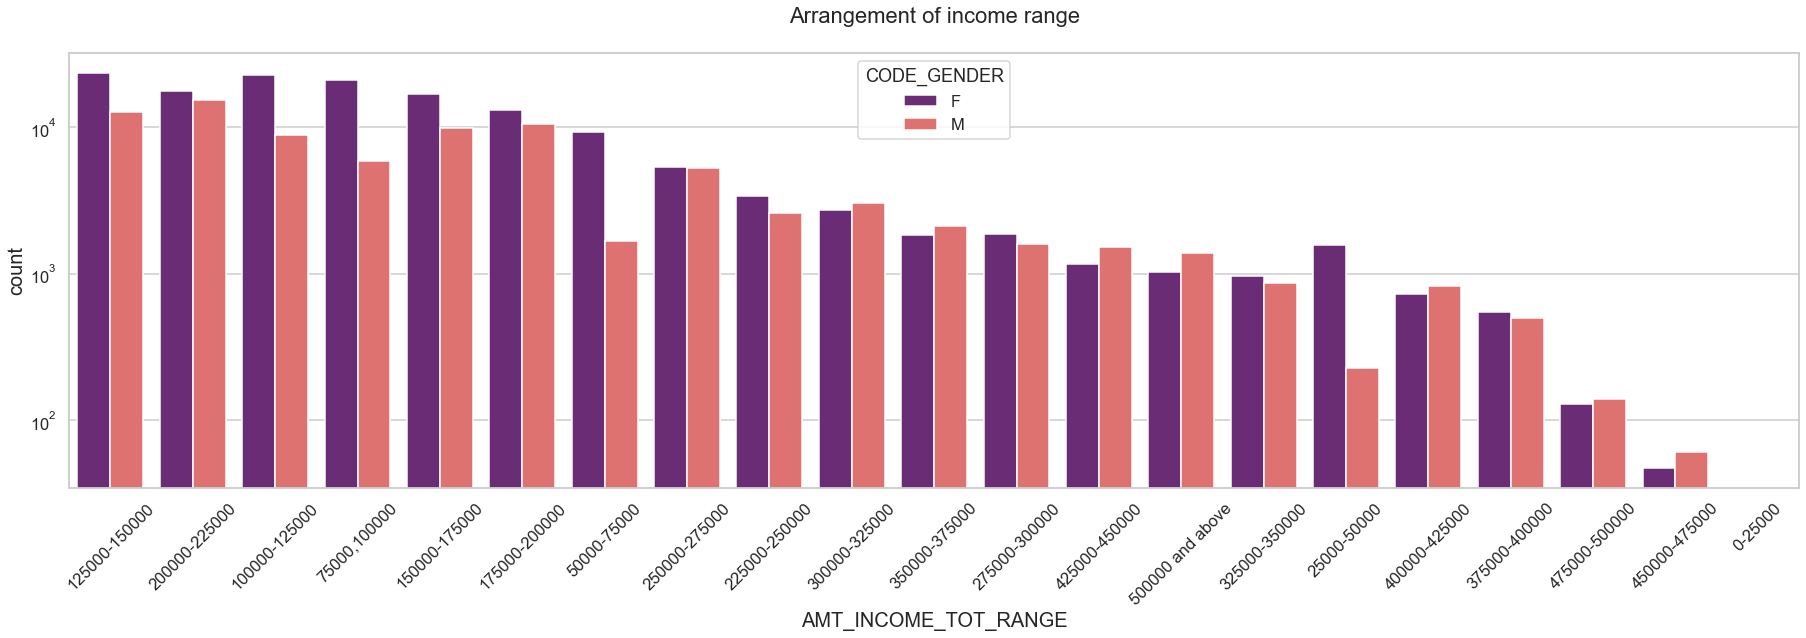

In [25]:
#plotting for income range
uniplot(df_target0,col='AMT_INCOME_TOT_RANGE',title='Arrangement of income range',hue='CODE_GENDER')

conclusions from the graph:

    females are more than males in having credit range.
    Income range from 100000 to 200000 is having more number of credits.
    Very less count in income range 400000 and above.
    

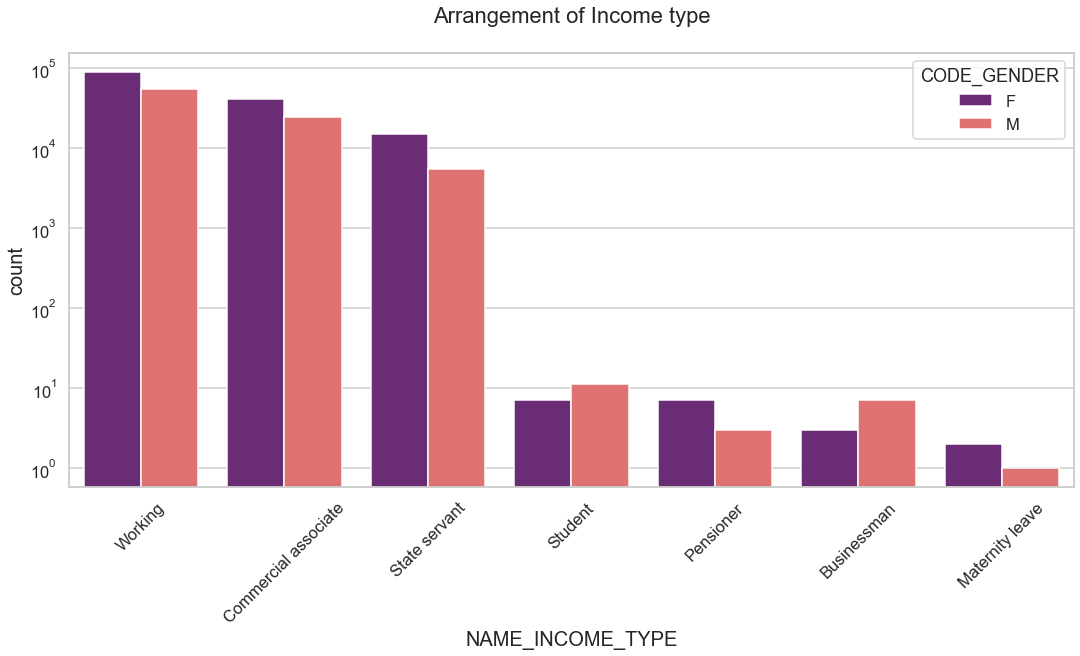

In [26]:
#plotting for income type:
uniplot(df_target0,col='NAME_INCOME_TYPE',title='Arrangement of Income type',hue='CODE_GENDER')

CONCLUSIONS FROM THE GRAPH:
    
    Females counts in having credits are more than male 
    For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher
    for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ the number of credits are low

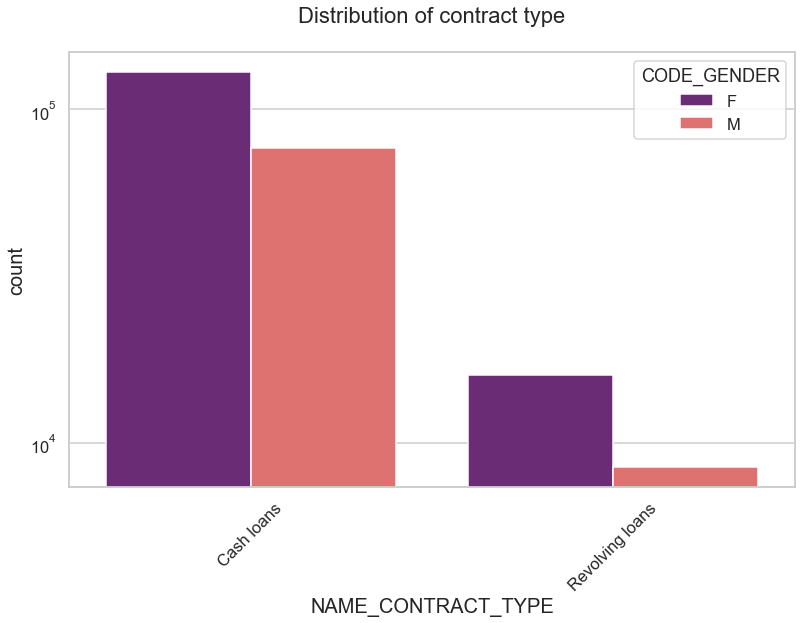

In [27]:
#plotting the contract type
uniplot(df_target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

CONCLUSION FROM THE GRAPH:
    
    Female count is more in comparision to male count
    For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ 

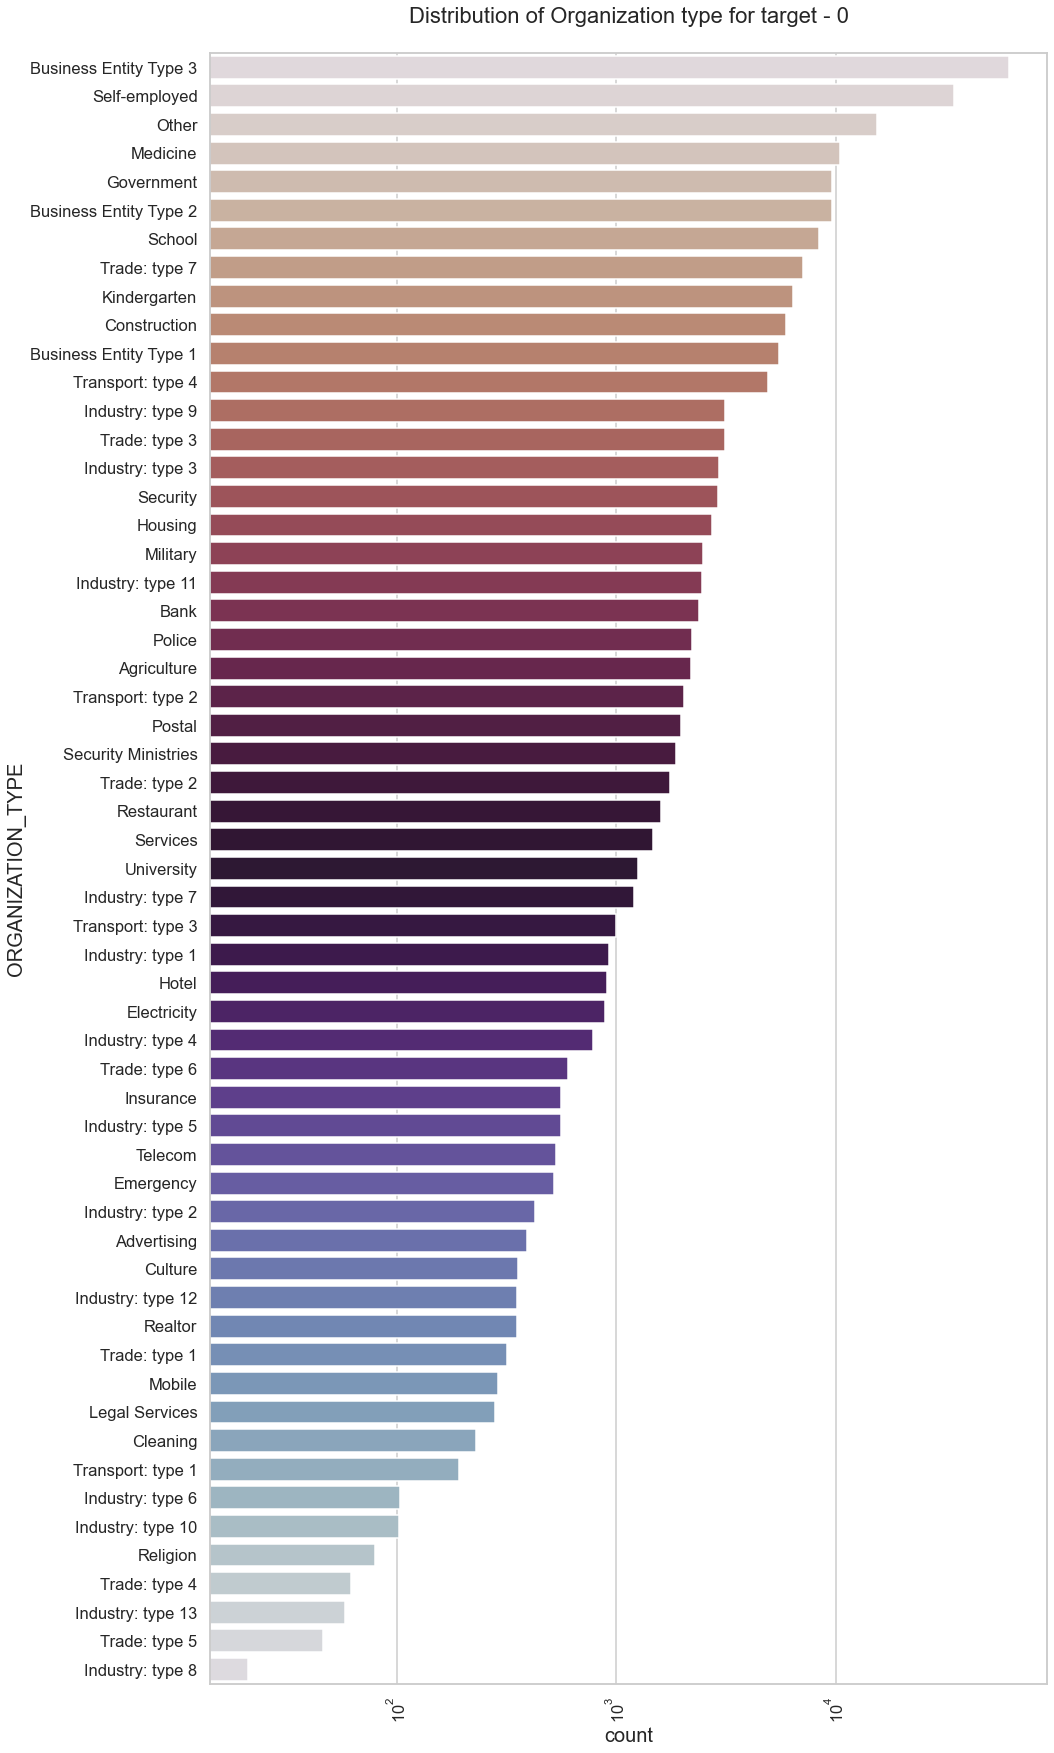

In [28]:
#plotting organization type in logarithmic scale:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df_target0,y='ORGANIZATION_TYPE',order=df_target0['ORGANIZATION_TYPE'].value_counts().index,palette='twilight_r')

plt.show()

CONCLUSIONS FROM THE GRAPH:
    
    Clients from the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’ have applied most for the credit
    Clients from Industry type 8,type 6, type 10, religion and trade type 5, type 4 are less

Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)

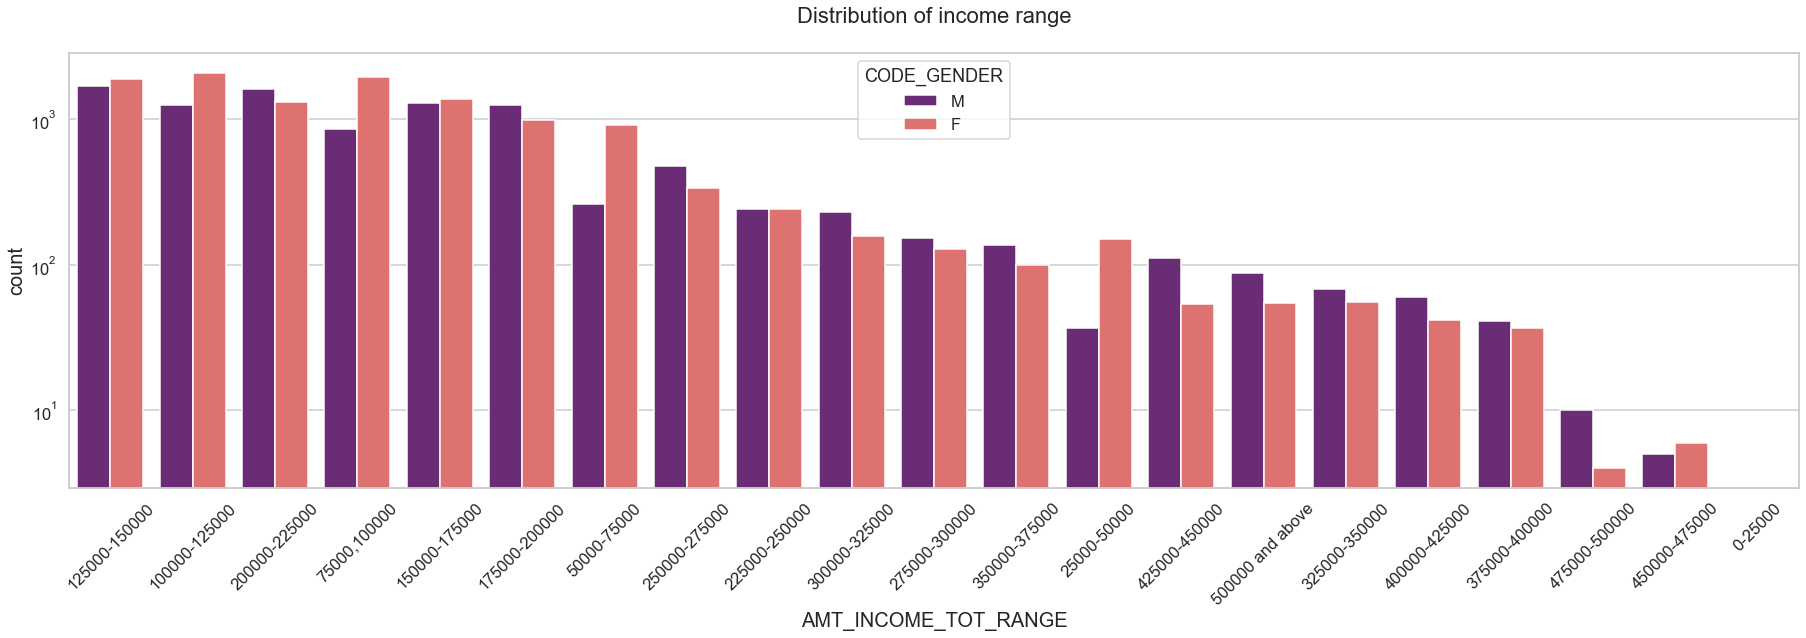

In [29]:
# Plotting for income range
uniplot(df_target1,col='AMT_INCOME_TOT_RANGE',title='Distribution of income range',hue='CODE_GENDER')

CONCLUSIONS FROM THE GRAPH:
    
    This graph show that males are more than female in having credits for that range.
    Very less count for income range 400000 and above.
    Income range from 100000 to 200000 is having more number of credits.

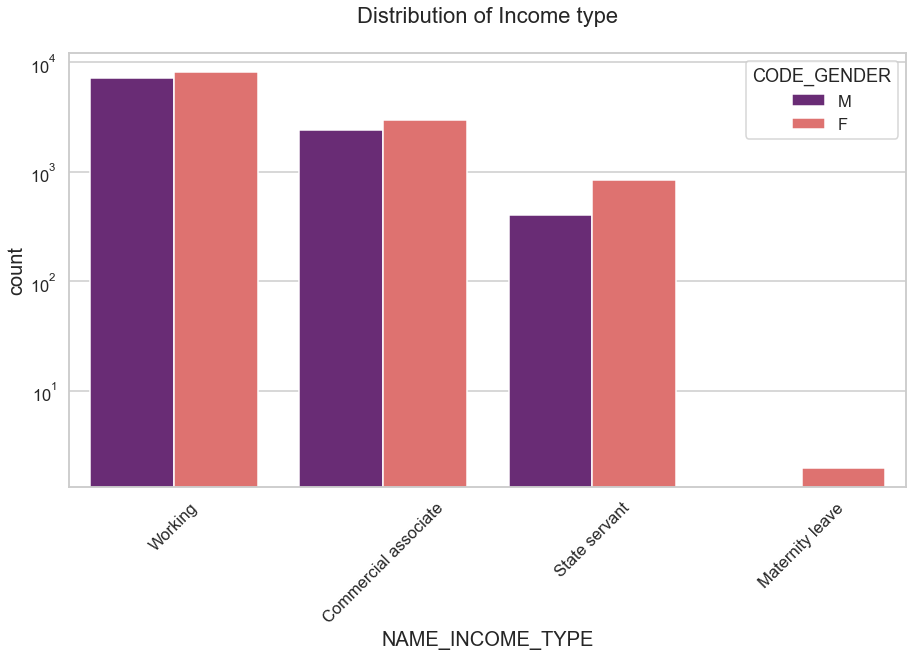

In [30]:
# Plotting for Income type
uniplot(df_target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

CONCLUSIONS FROM THE GRAPH:

    For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.     ‘Maternity leave.
    For this Females are having more number of credits than male.
    Less number of credits for income type ‘Maternity leave’.

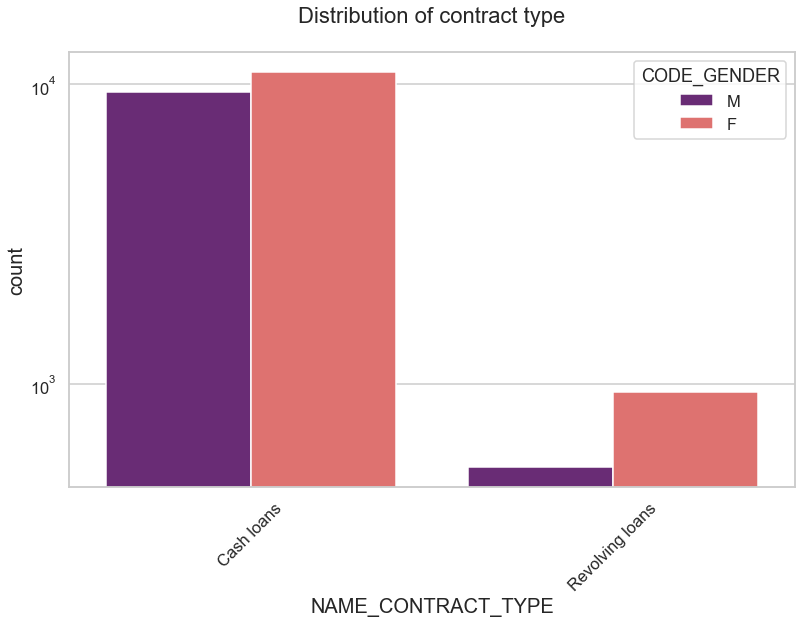

In [31]:
# Plotting for Contract type
uniplot(df_target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

CONCLUSIONS FROM THE GRAPH:

    For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
    Female is leading for applying credits.
    For type 1 : there is only Female Revolving loans.

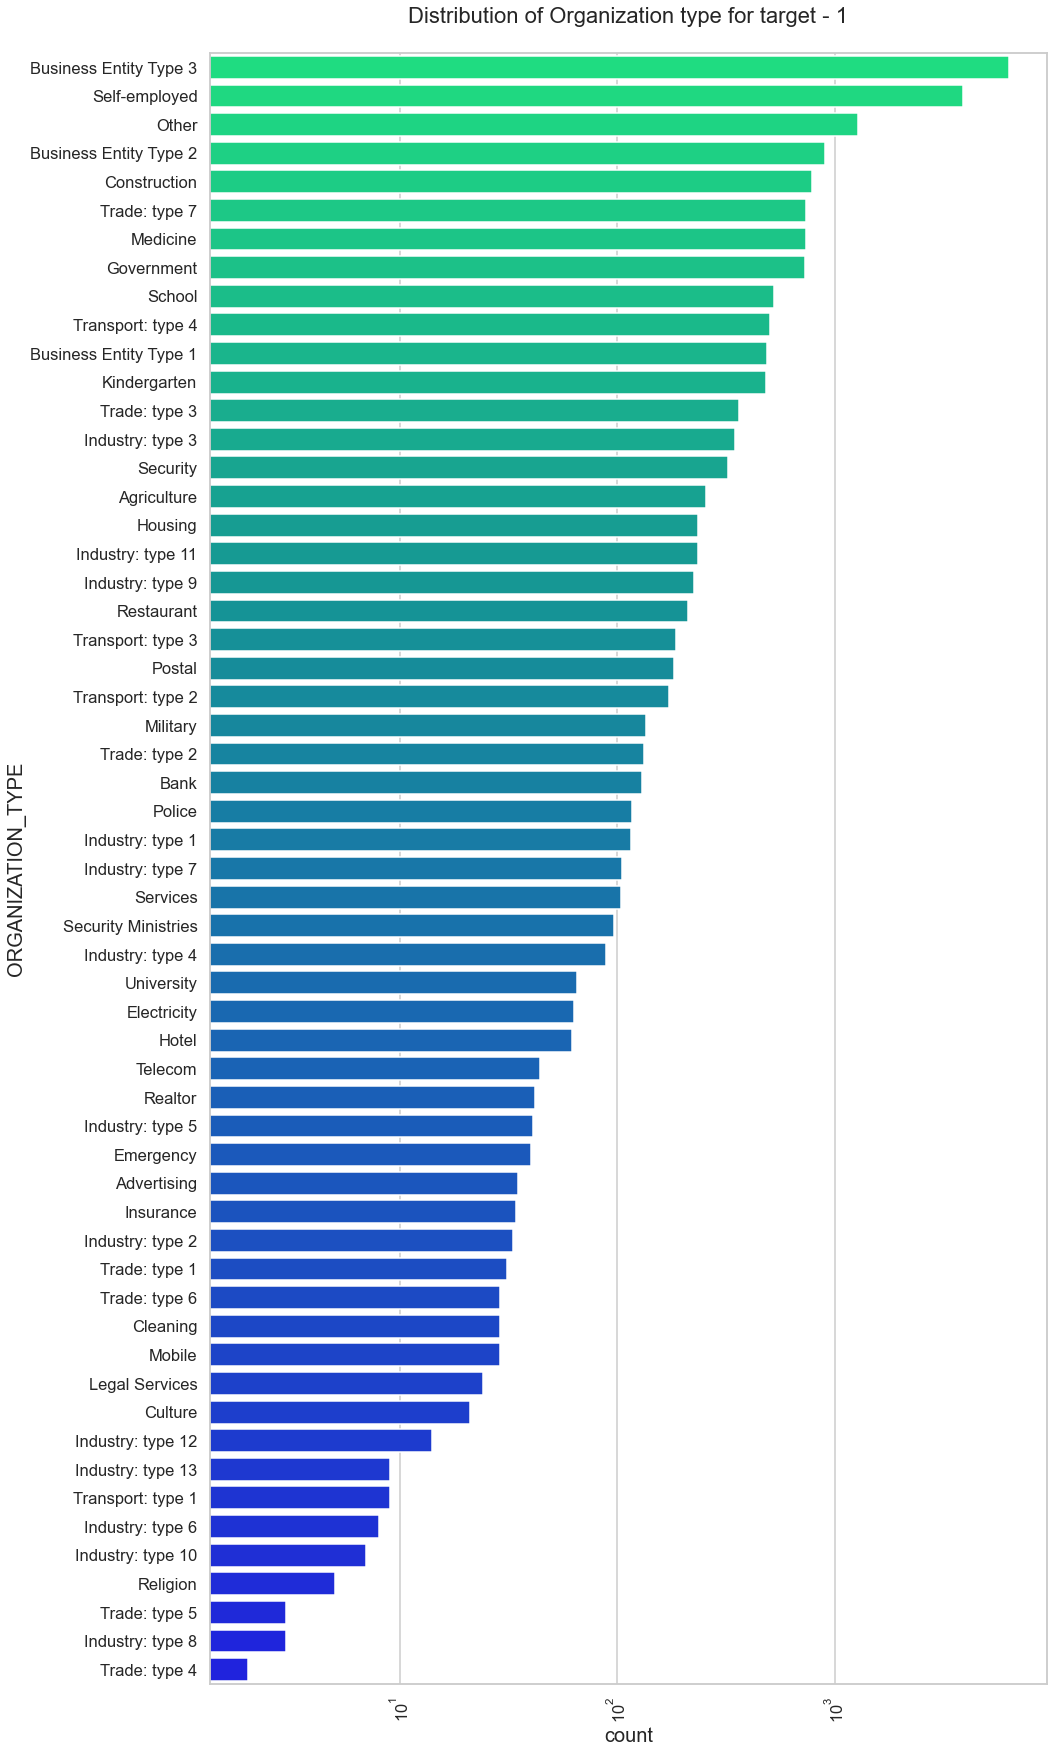

In [32]:
# Plotting for Organization type in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df_target1,y='ORGANIZATION_TYPE',order=df_target1['ORGANIZATION_TYPE'].value_counts().index,palette='winter_r')

plt.show()

CONCLUSIONS FROM THE GRAPH:
    
    Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
    Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

In [33]:
# Finding some correlation for numerical columns for both target 0 and 1 
target0_corr=df_target0.iloc[0:,2:]
target1_corr=df_target1.iloc[0:,2:]
target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')



In [34]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [35]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [36]:
#plotting the above correlation with heat map to visulaize
# figure size
def targ_corlatn(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 55

# heatmap with a color map of choice


    sns.heatmap(data, cmap='RdYlBu',annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

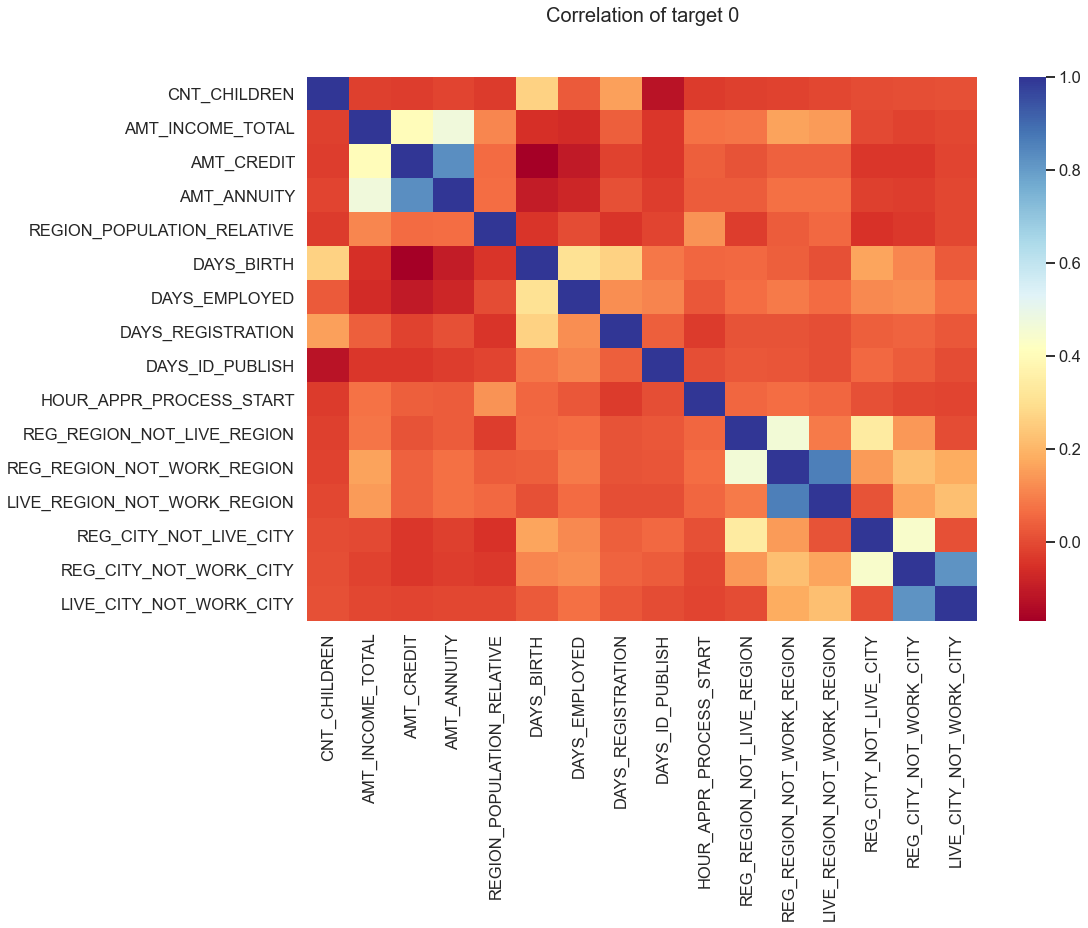

In [37]:
# For Target 0
targ_corlatn(data=target0,title='Correlation of target 0')

CONCLUSIONS FROM THE GRAPH:there are number of observations such as,
    
    COUNT OF CHILDREN is inversely proportional to publish id days
    Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age
    Income amount is inversely proportional to the number of children client have, means more income for less children client have 

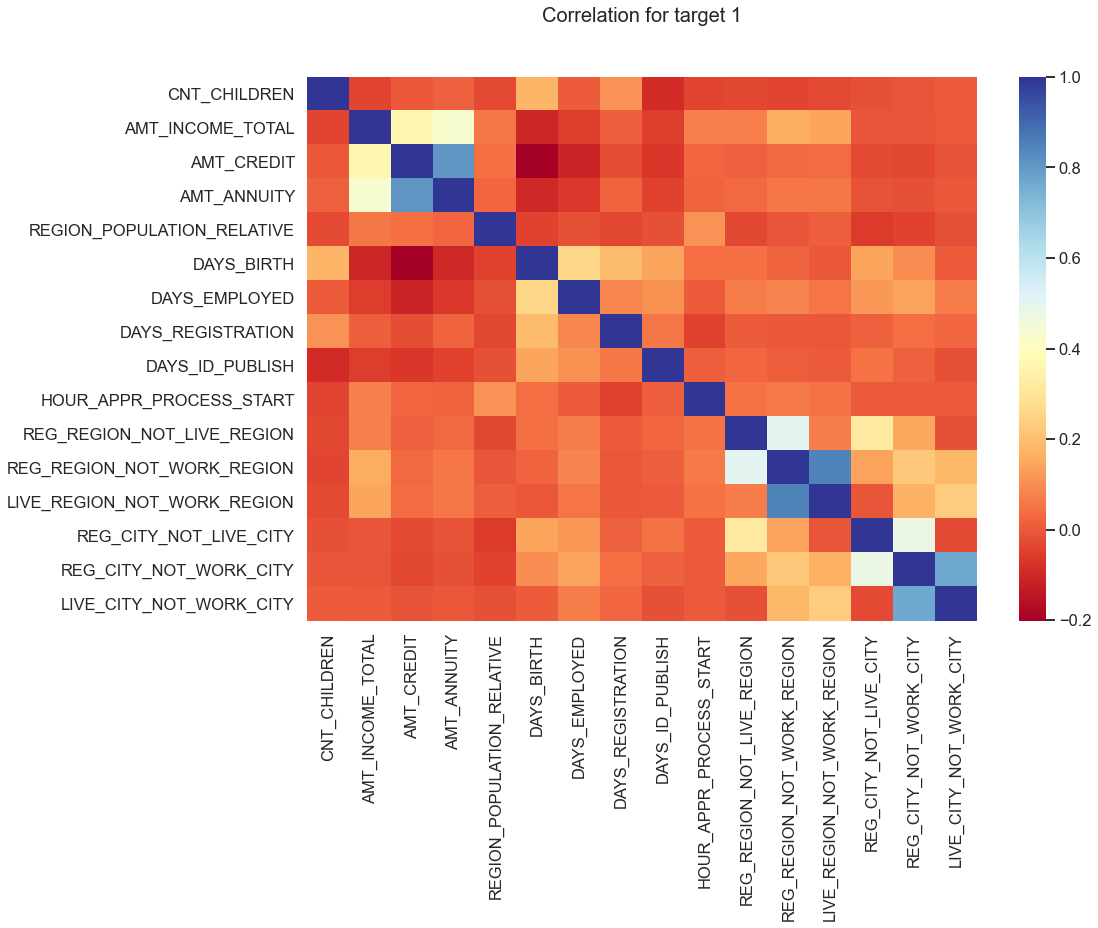

In [38]:
# For Target 1
targ_corlatn(data=target1,title='Correlation for target 1')

CONCLUSIONS FROM THE GRAPH:
    
    THE observations are quite same to TARGET 0

UNIVARIATE ANALYSIS FOR VARIABLES:
    

In [39]:
# Box plotting for univariate variables analysis in logarithmic scale
def univar_num(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =df_target1, y=col,orient='v')
    plt.show()

FINDING OUTLIERS FOR TARGET 0:


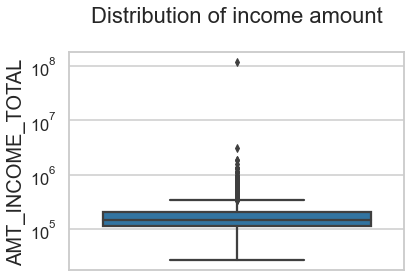

In [40]:
# of income amount

univar_num(data=df_target0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

CONCLUSIONS:
    
    There are outliers present in income amount
    first quartile is more in comparision to 3rd,which means client with income amount are more in the range of first quartile

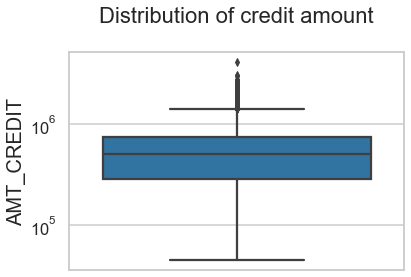

In [41]:
# Disrtibution of credit amount
univar_num(data=df_target0,col='AMT_CREDIT',title='Distribution of credit amount')

CONCLUSIONS:
    
    There is outliers in credit amount
    The clients with most credits are present in first quartile

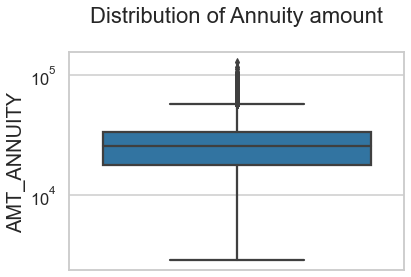

In [42]:
# Distribution of anuuity amount
univar_num(data=df_target0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

CONCLUSIONS:
    
    The most of the annuity clients are present in first quartile
    Less annuity clients are present in the 3rd quartile 
    Very few outlier are noticed

OUTLIER FOR TARGET 1

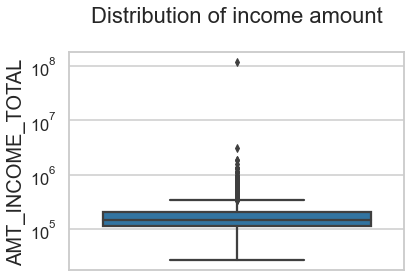

In [43]:
# income amount

univar_num(data=df_target1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

CONCLUSIONS:
    
    There are outliers in income amount
    The third quartiles is very slim for income amount.
    Most of the clients of income are present in first quartile.

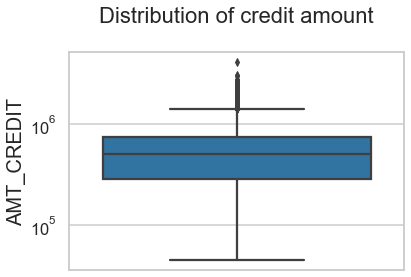

In [44]:
# credit amount

univar_num(data=df_target1,col='AMT_CREDIT',title='Distribution of credit amount')

CONCLUSIONS:
    
    Some outliers are therecredit amount.
    The first quartile is bigger than third quartile for credit amount which means most of the clients with most credits are present in 1st quartile

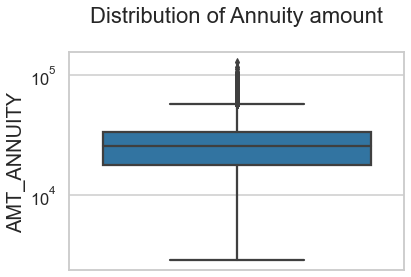

In [45]:
#Distribution of Annuity amount
univar_num(data=df_target1,col='AMT_ANNUITY',title='Distribution of Annuity amount')

CONCLUSIONS:

   The most of the annuity clients are present in first quartile
   less annuity clients in 3rd quartile
   
   very few outlier are noticed

BIVARIATE ANALYSIS OF NUMERICAL VARIABLES

FOR TARGET 0

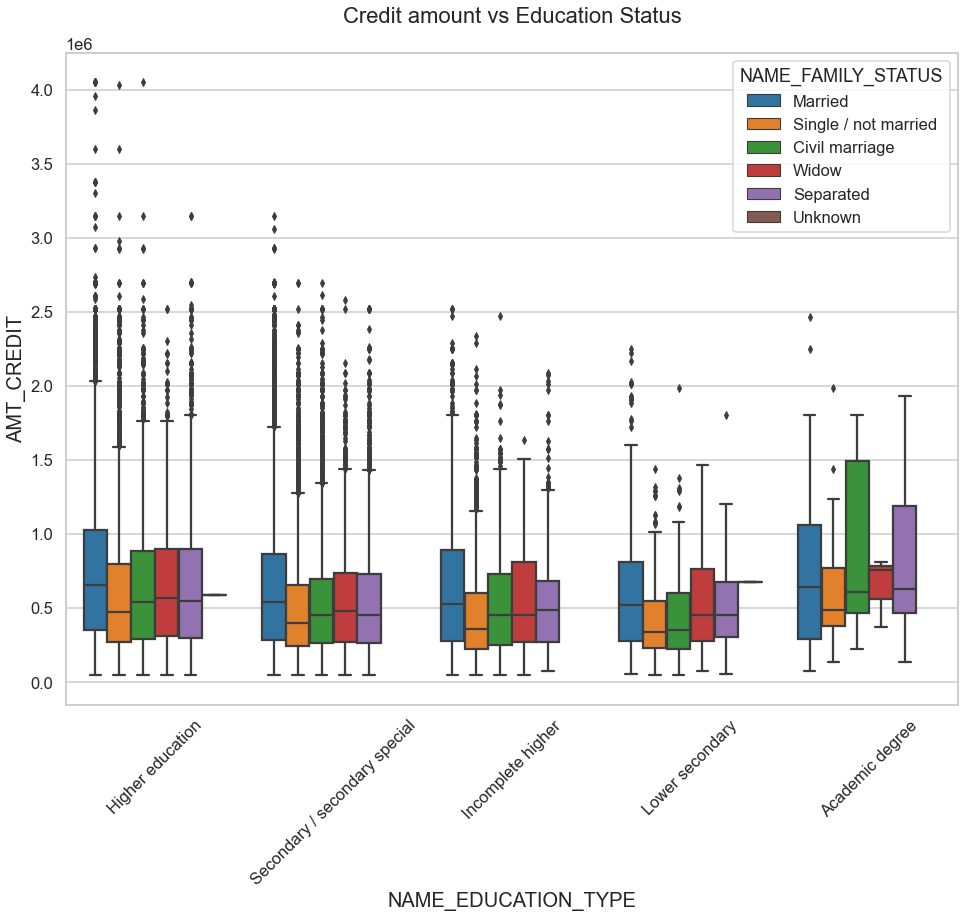

In [46]:
# Box plotting for Credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

CONCLUSIONS:
    
    Family status like 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
    Also, higher education of family status of 'marriage', 'single' and 'civil marriage' have more outliers

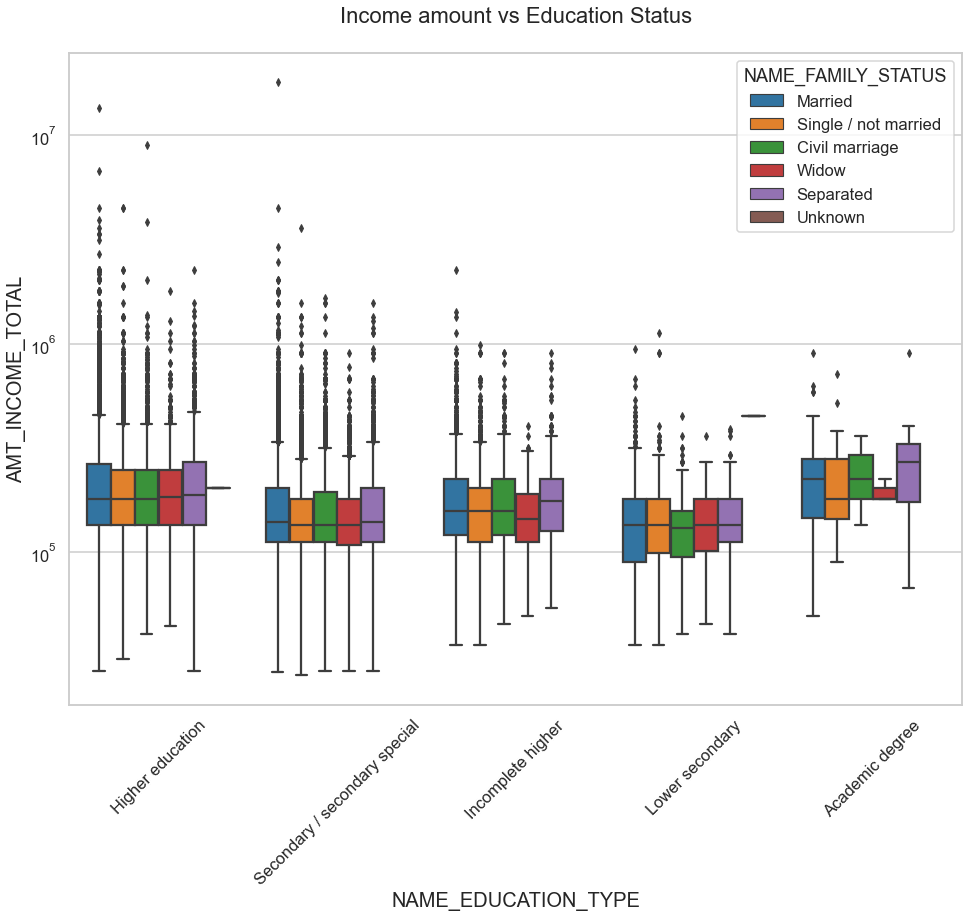

In [47]:
# Box plotting for Income amount in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data=df_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

CONCLUSIONS:
    
    there are Less outlier  for Academic degree but there income amount is higher than others.
    Lower secondary of civil marriage family status have less income amount than others.
    For Education type 'Higher education' the income amount is mostly equal with all family status

TARGET 1:-

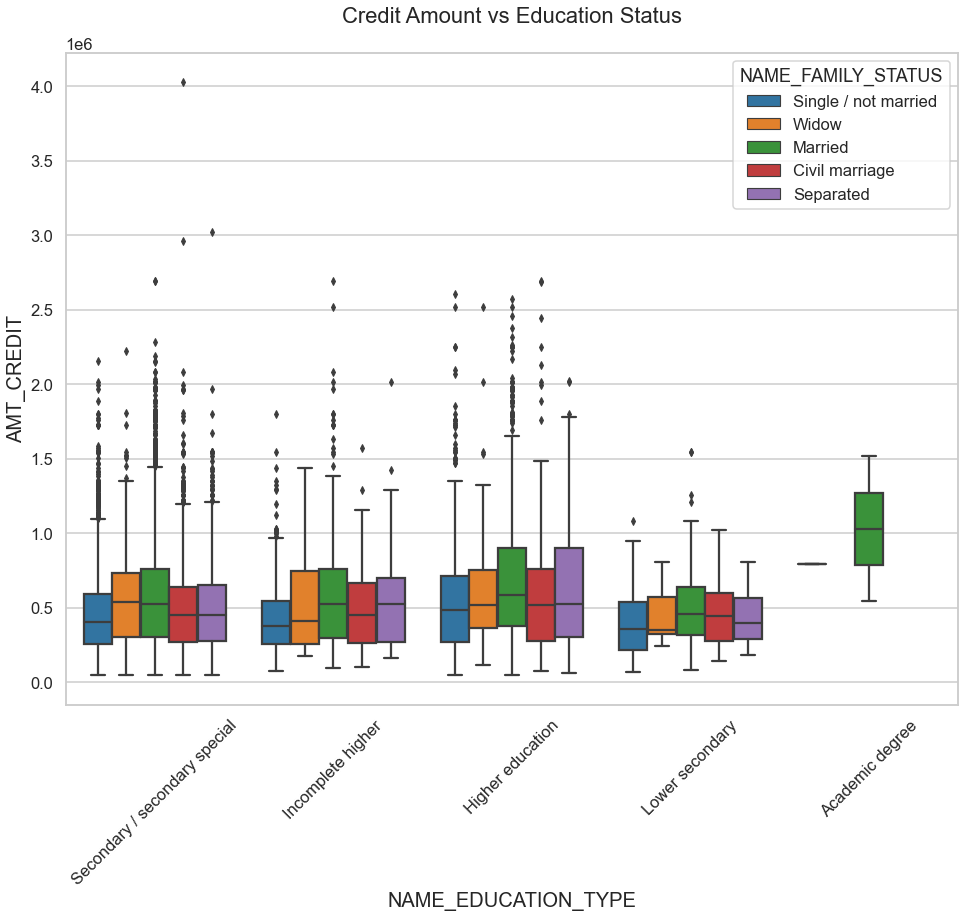

In [48]:
# Box plotting for credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

CONCLUSIONS:
    
     Family status of 'civil marriage' of Academic degree education are having higher number of credits than others.
     Most of the outliers are from Education type 'Higher education' and 'Secondary

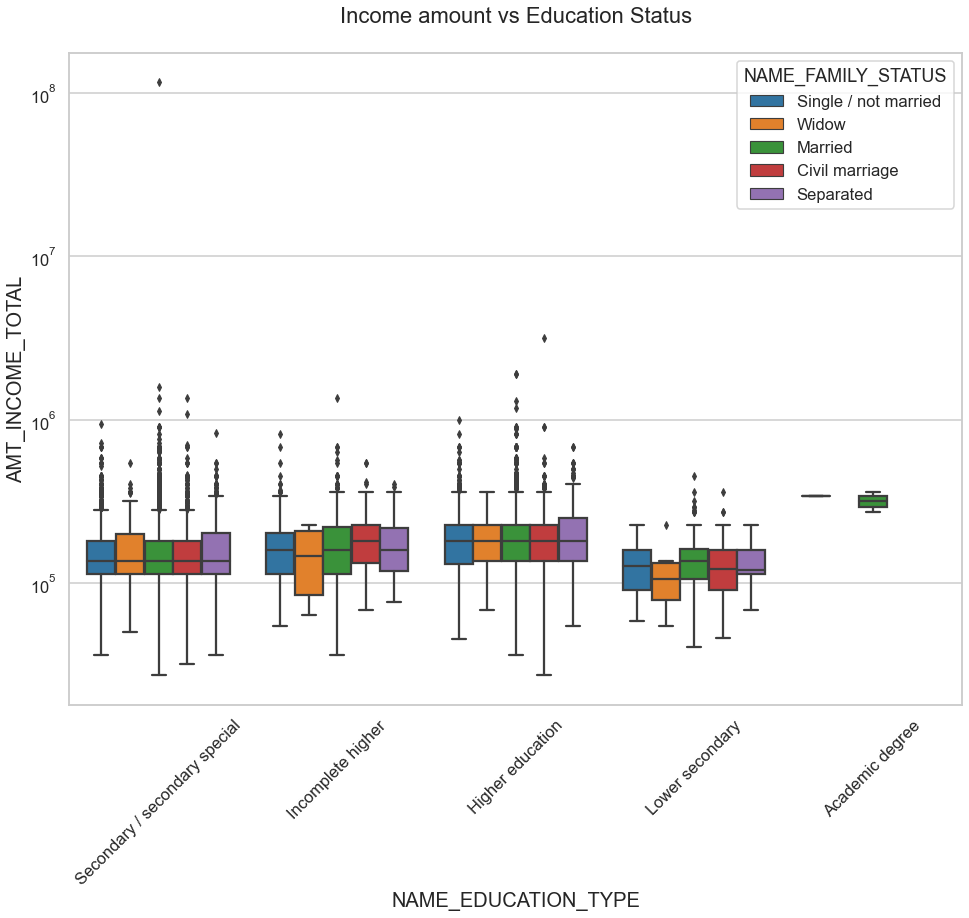

In [49]:
# Box plotting for Income amount in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

CONCLUSIONS:
    
     For Education type 'Higher education' the income amount is mostly equal for all family status. No outlier  for Academic degree but income amount is higher. 
    Lower secondary  have less income amount than others.

CHANGING THE READING DIRECTORY OF DATA SET


In [50]:
#READING THE DATA SET OF PREVIOUS APPLICATION:
df1=pd.read_csv(r"C:\Users\USER\Desktop\Analytics with Excel\Case Study - EDA - Sem 1\previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#removing those null value columns
nullcol = df1.isnull().sum()
nullcol = list(nullcol[nullcol.values>=0.3].index)
df1.drop(labels=nullcol,axis=1,inplace=True)

df1.shape

(1670214, 21)

In [54]:
# column having values of 'XNA' and 'XAP'
print(df1[df1["NAME_CASH_LOAN_PURPOSE"]=='XNA'].shape)
print(df1[df1["NAME_CASH_LOAN_PURPOSE"]=='XAP'].shape)



(677918, 21)
(922661, 21)


In [55]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 21)

In [57]:
#MERGING APPLICATION DATA SET WITH PREVIOUS APPLICATION DATASET

merged_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes=('', '_delme'))

In [63]:
#renaming columns after merging:
merged_df1 = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   SK_ID_CURR                        51420 non-null  int64   
 1   TARGET                            51420 non-null  int64   
 2   NAME_CONTRACT_TYPE                51420 non-null  object  
 3   CODE_GENDER                       51420 non-null  object  
 4   FLAG_OWN_CAR                      51420 non-null  object  
 5   FLAG_OWN_REALTY                   51420 non-null  object  
 6   CNT_CHILDREN                      51420 non-null  int64   
 7   AMT_INCOME_TOTAL                  51420 non-null  float64 
 8   AMT_CREDIT                        51420 non-null  float64 
 9   AMT_ANNUITY                       51420 non-null  float64 
 10  NAME_INCOME_TYPE                  51420 non-null  object  
 11  NAME_EDUCATION_TYPE               51420 non-null  obje

UNIVARIATE ANALYSIS

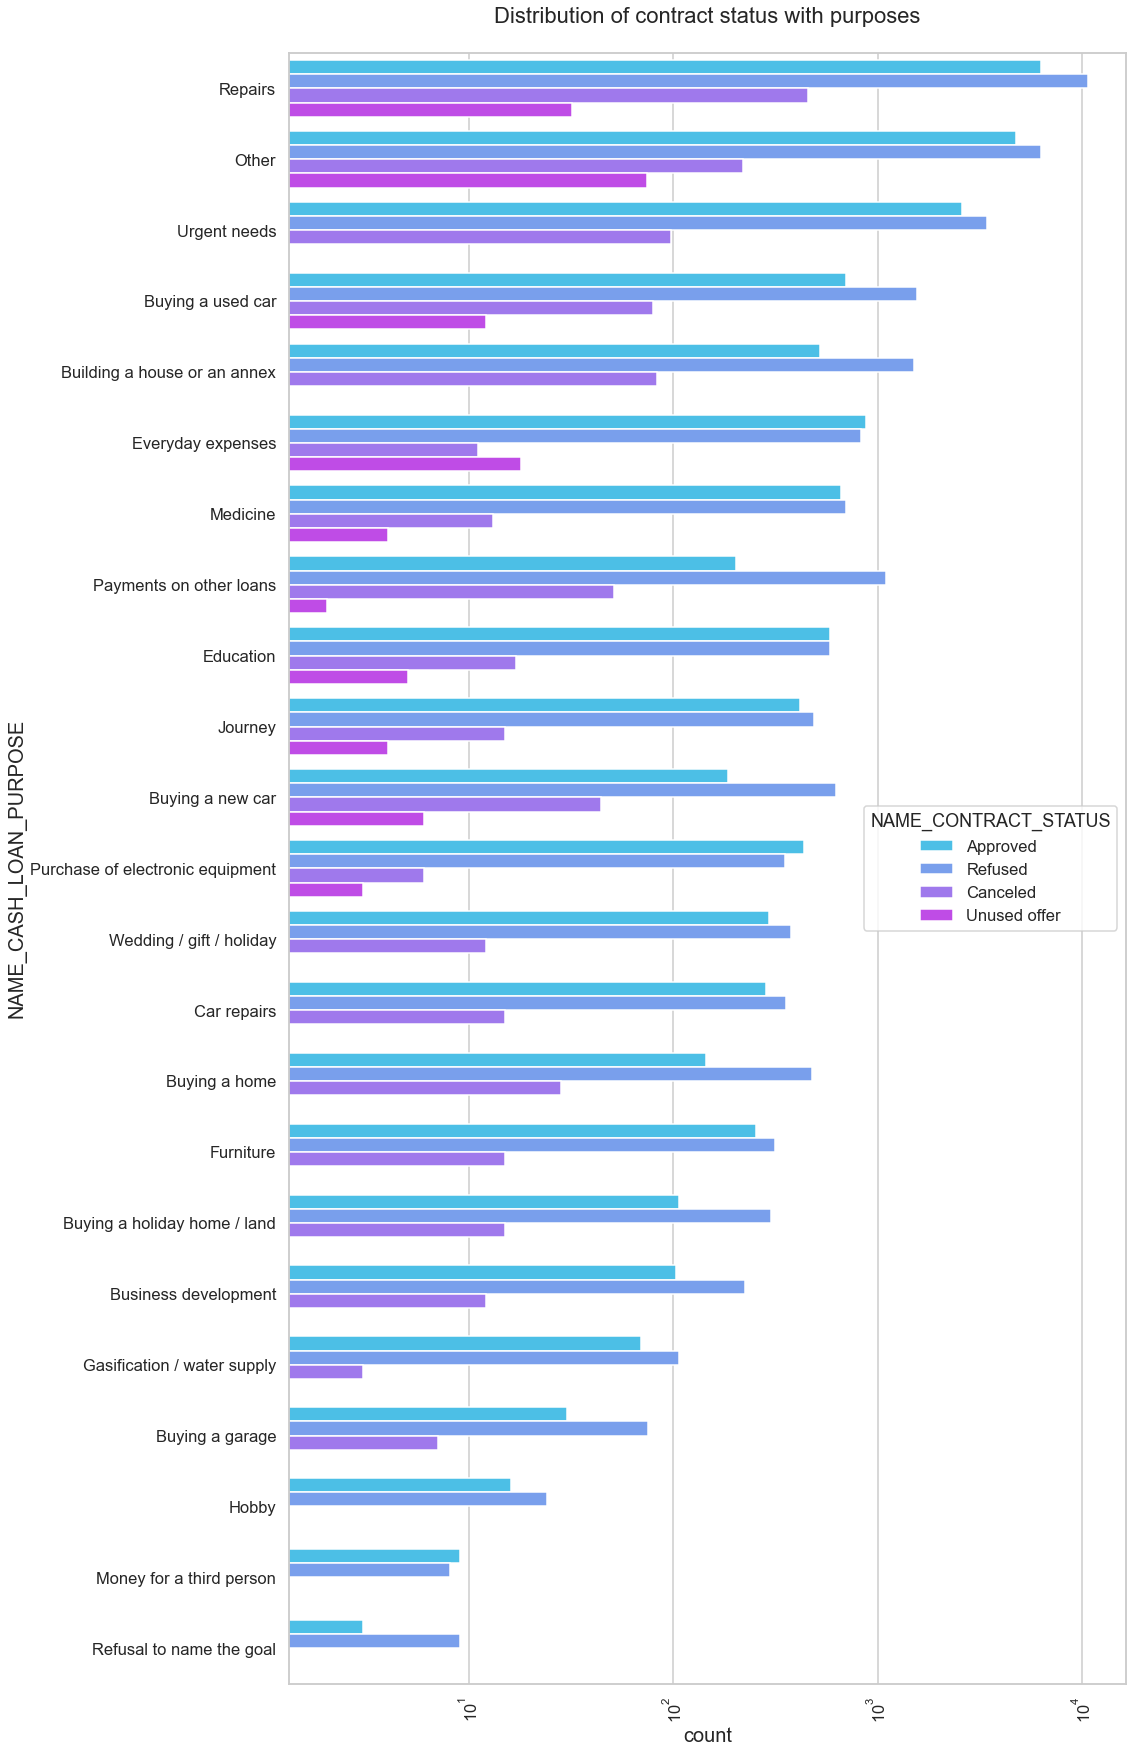

In [59]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merged_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='cool') 

CONCLUSIONS :
    
    'education purposes' have equal number of approves and rejection
    'Repair purpose' have higher rejection in loans
    'Purchase of electronic equipment purpose' 'has more approved loans than rejection
    'payment on other loans' has more rejection in comparision to approval

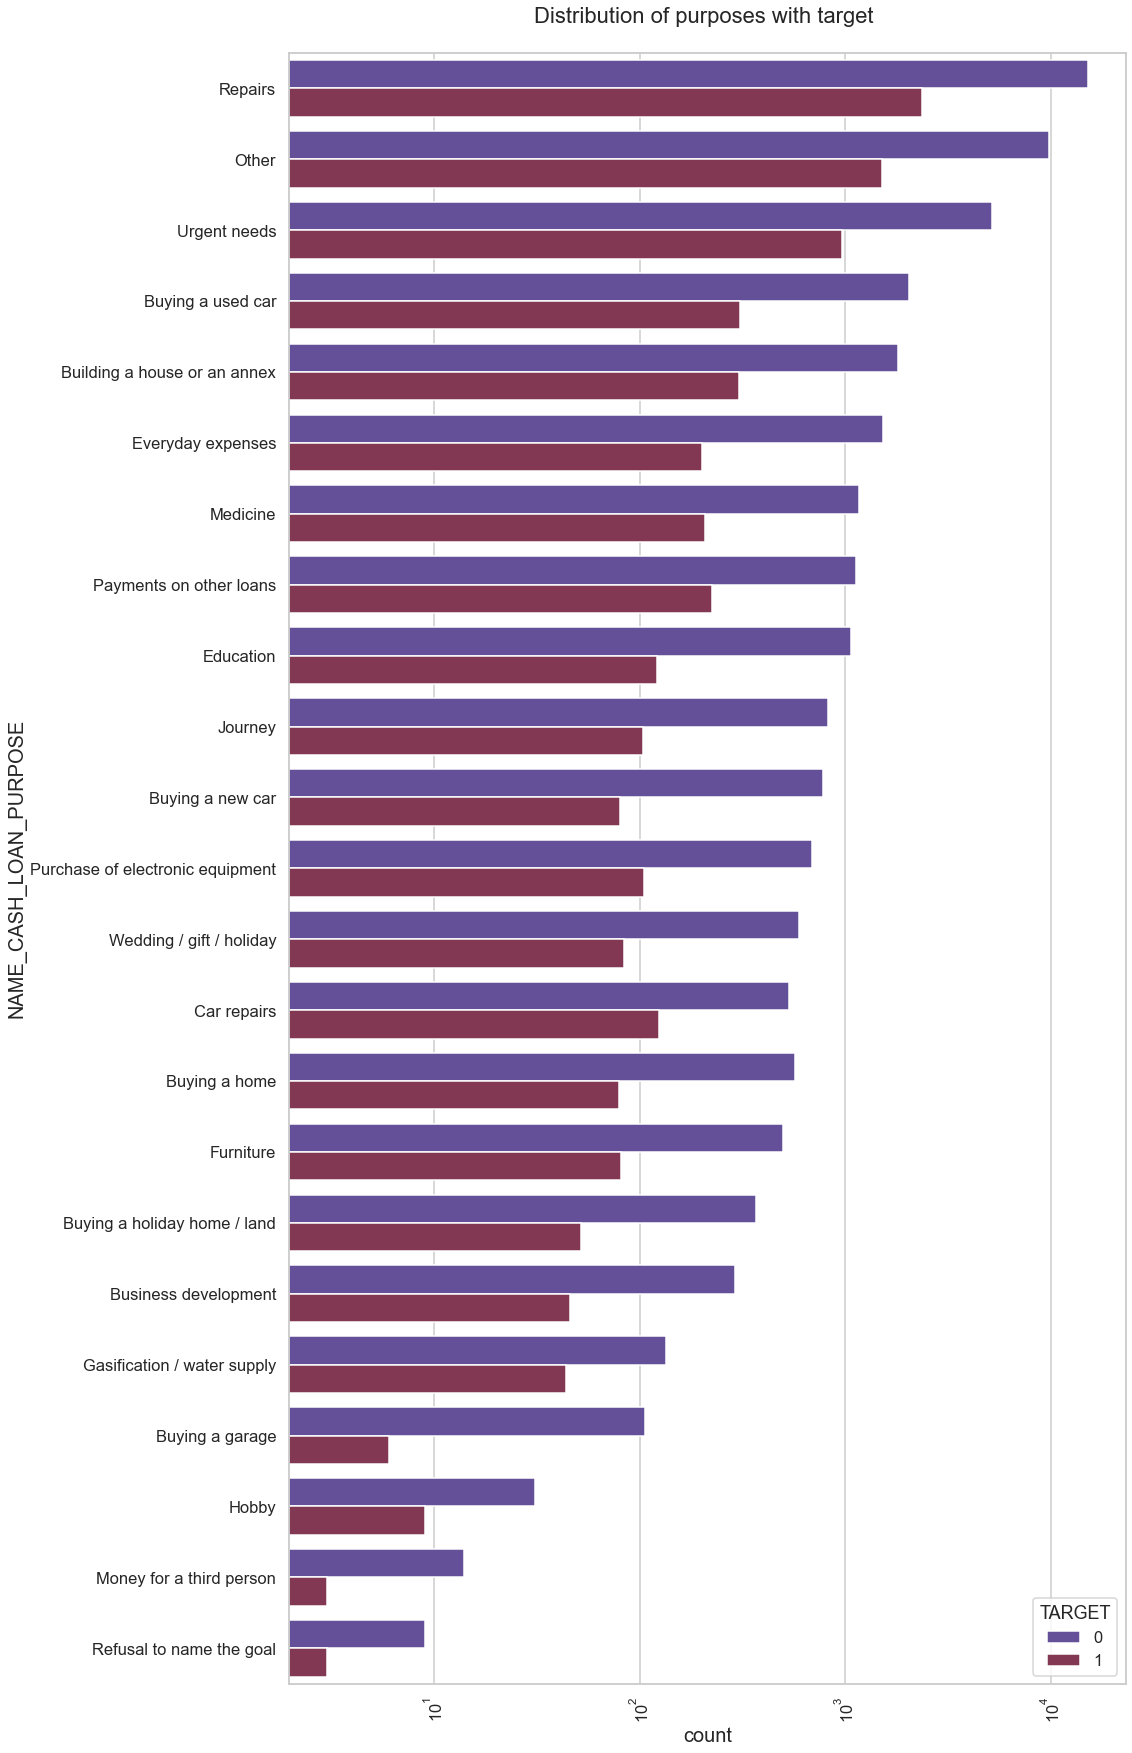

In [60]:
# Distribution of contract status
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='twilight') 

CONCLUSIONS:
    
    'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' are the purpose where the payment difficultis are very less in comparison to payment.
    'Repairs' purpose is facing more difficulites in payment on time

BIVARIATE ANALYSIS:
    

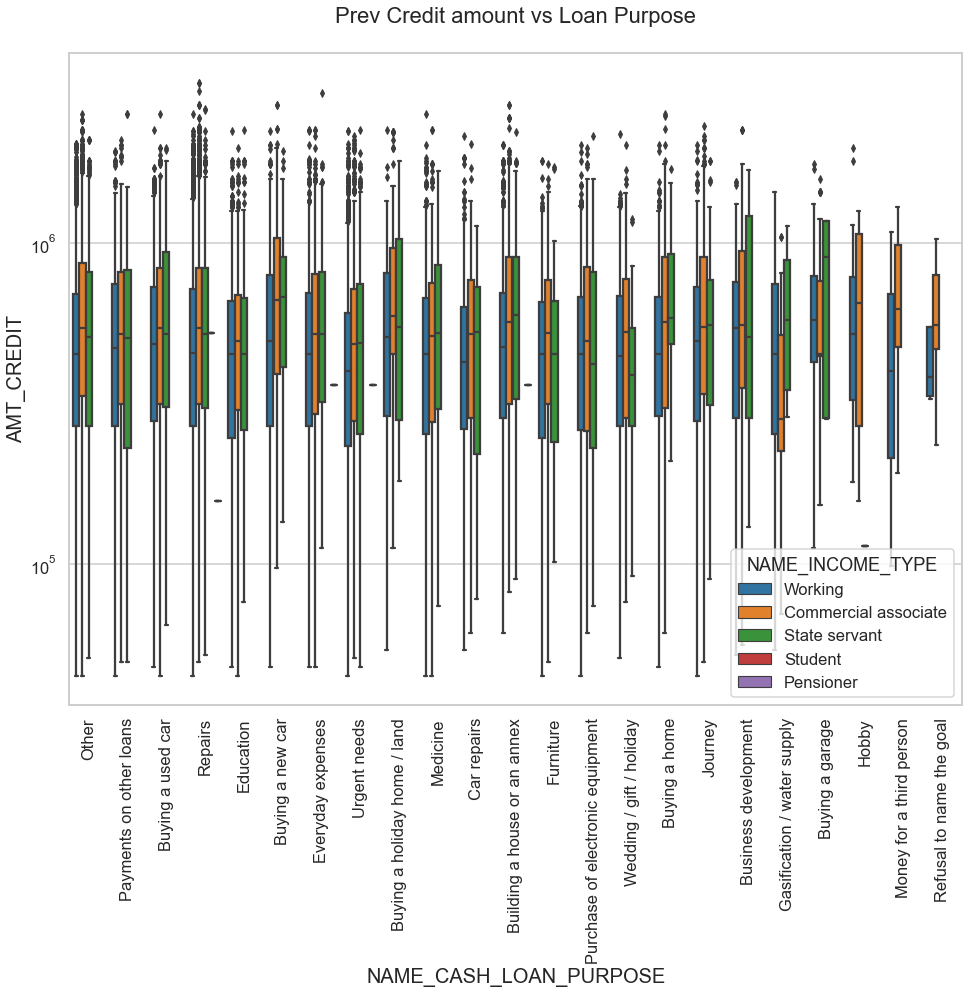

In [64]:
#BOX PLOT FOR CREDIT AMAOUNT:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merged_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

CONCLUSIONS:
    
    
    'Buying a home','Buying a land','Buying a new car' and'Building a house' has higher credit amount for loan purpose
    Income type of state servants have a significant amount of credit applied
    Money for third person or a Hobby is having less credits applied for.

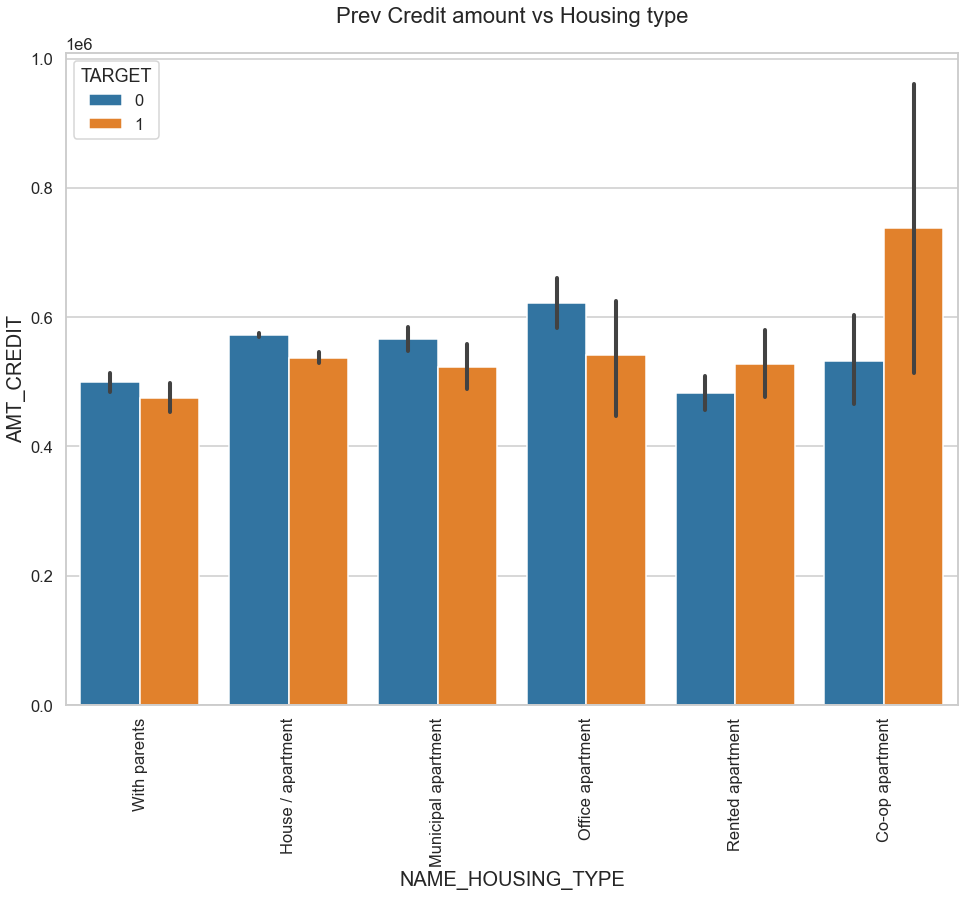

In [65]:
#Box plot for Credit amount prev vs Housing type
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merged_df1, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

CONCLUSIONS:
    
    co-op apartment is having higher credit for target 1.so, bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment
    office appartment is having higher credit for target 0 
    housing type with parents or House\appartment or miuncipal appartment having minimal payment difficulties can be approved for loans
    
    

## *CONCLUSIONS*
# *banks can look  for approval on:*
    
    housing type with parents or House\appartment or miuncipal appartment having minimal payment difficulties can be approved for loans.
    contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ have minimal payment difficulties

# *bank should take step on rejection of loan for:*
    
    loan purpose ‘Repair’  which is having higher number of unsuccessful payments on time.
    Income type ‘Working’ which is having most number of unsuccessful payments
   